In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from skimage.transform import resize
from astropy.io import fits
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift

files = {
    'F090M':    'reprojected/F090W.fits',
    'F150M':    'reprojected/F150M.fits',
    'F200M':    'reprojected/F200M.fits',
    'F277M':    'reprojected/F277M.fits',
    'F356M':    'reprojected/F356M.fits',
    'F444M':    'reprojected/F444M.fits',
    'F770W1':   'reprojected/F770W1.fits',
    'F1000W1':  'reprojected/F1000W1.fits'
}

In [2]:
# Load and preprocess each image
def load_and_clean(filename):
    data = fits.open(filename)[0].data
    data = np.nan_to_num(data)
    print(filename, data.shape)
    
    data[data < 0] = 0

    return np.asinh(data)

# Normalize
def normalize(image):
    return rescale_intensity(image, in_range='image', out_range=(0, 1))

In [3]:
# Load all images
f090 = normalize(load_and_clean(files['F090M']))
f150 = normalize(load_and_clean(files['F150M']))
f200 = normalize(load_and_clean(files['F200M']))
f277 = normalize(load_and_clean(files['F277M']))
f356 = normalize(load_and_clean(files['F356M']))
f444 = normalize(load_and_clean(files['F444M']))

# MIRI images
f7701 = normalize(load_and_clean(files['F770W1']))
f10001 = normalize(load_and_clean(files['F1000W1']))

reprojected/F090W.fits (6057, 7090)
reprojected/F150M.fits (6057, 7090)
reprojected/F200M.fits (6057, 7090)
reprojected/F277M.fits (6057, 7090)
reprojected/F356M.fits (6057, 7090)
reprojected/F444M.fits (6057, 7090)
reprojected/F770W1.fits (6057, 7090)
reprojected/F1000W1.fits (6057, 7090)


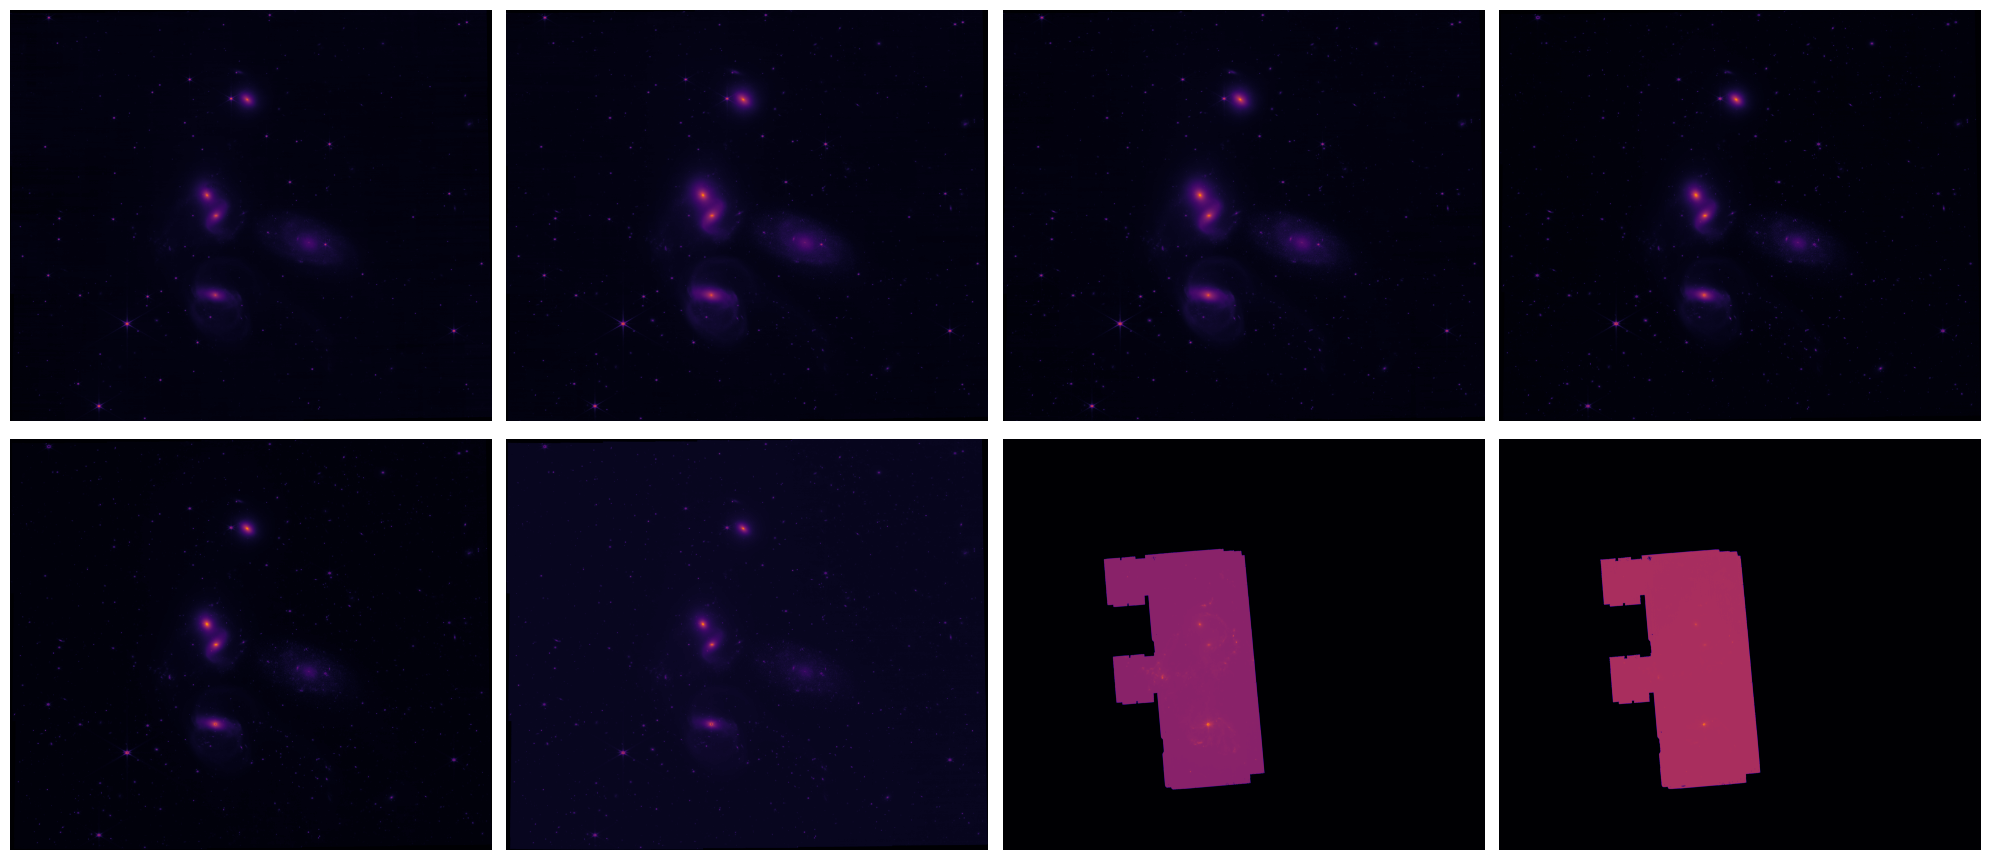

In [4]:
# Plot them individually for reference
images = [f090, f150, f200, f277, f356, f444, f7701, f10001]

fig, axes = plt.subplots(2, 4, figsize=(20, 9))
axes = axes.flatten()  

for ax, img in zip(axes, images):
    ax.imshow(img, cmap='inferno', origin='lower')
    ax.axis('off') 

plt.tight_layout()
plt.show()

In [5]:
# Red: F356W + F444W
r = f356 + f444 
# Green: F200W + F277W (adding F277W for yellow component)
g = f200 + 0.5 * f277
# Blue: F090W + F150W
b = f090 + f150

# Stack the channels to create the RGB image
rgb = np.stack([r, g, b], axis=-1)

# Normalize the final result before displaying
rgb = normalize(rgb)

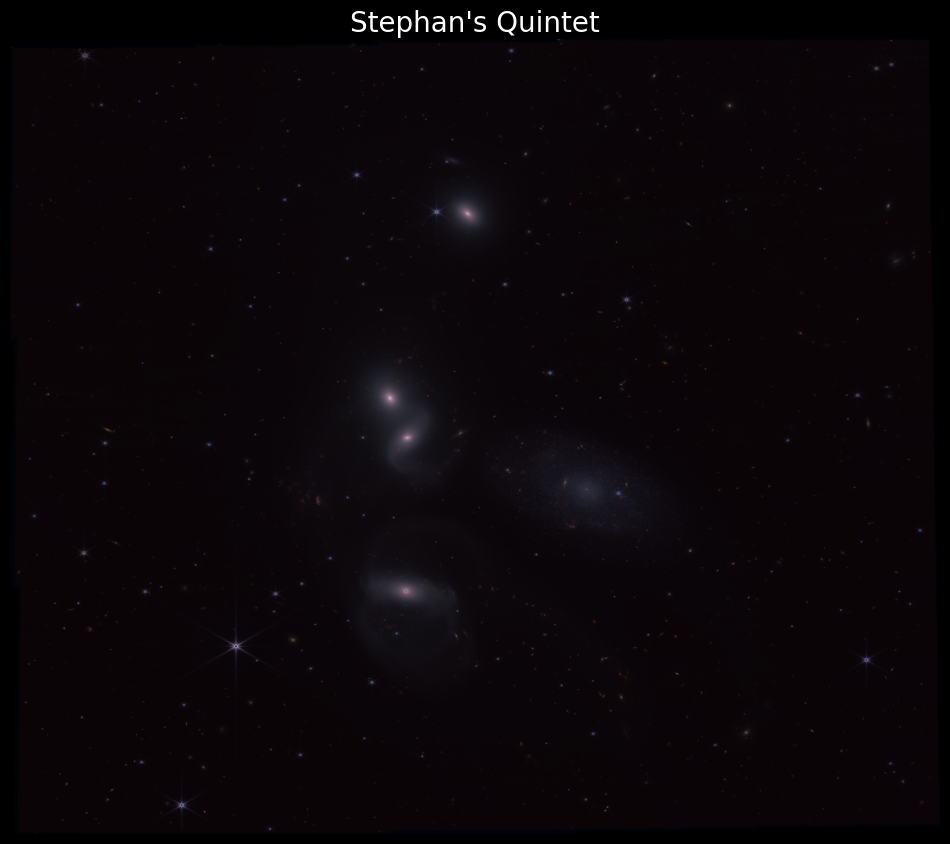

In [6]:
# Styling options
plt.rcParams.update({
        "text.color": "white",       # Titles and labels
        "axes.labelcolor": "white",  # Axis labels
        "xtick.color": "white",      # X-axis ticks
        "ytick.color": "white",      # Y-axis ticks
    })

# Display the result
plt.figure(figsize=(12, 12), facecolor='black')
plt.imshow(rgb, origin='lower')
plt.title("Stephan's Quintet", fontsize=20)
plt.axis('off')
#plt.savefig("results/output.png", dpi=600, bbox_inches='tight') # Note the DPI. Will determine the quality and processing time
plt.show()